## Random Generation of Combinatorial Objects

Another way to study the behaviour of combinatorial classes is generate random objects of large size.

A **uniform generation algorithm** for a combinatorial class $\mathcal{C}$ is a *randomized* algorithm that takes $n \in \mathbb{N}$ and returns an element $c \in \mathcal{C}_n$ in $\mathcal{C}$ of size $n$, where every element of $\mathcal{C}_n$ is returned with probability $1/c_n$.

How do we generate randomness?

Typically, we assume that we have access to a function `rand()` that returns a random real number in $[0,1)$.

It is possible to construct `rand` using random coin flips (topic in CS). Whether there exists "true randomness" is also a question for CS (or maybe philosophy?)

We can use `rand` to generate a random integer in $\{0,\dots,n\}$ by defining 

$$\text{rand}(0\dots n) = \lfloor (n+1) \cdot \text{rand}() \rfloor$$

We want algorithms that are correct, efficient, *and* easy to understand.

Some approaches to random generation:
- **Direct algorithm** (if simple enough)
- **Bijections** (or $k$-to-$1$ surjection)
- **Recursive sampling** (use specification)
- **Rejection sampling** (generate a larger set and repeat until desired property found)
- **Ranking / unranking** (order elements of $c_n$ efficiently and compute $k$th element where $k$ random)
- **Boltzmann sampling** (give up exact size to be more efficient)

**Example:** Find a uniform generation algorithm to compute a random binary string of length $n$.

**Answer:** Directly generate binary digits one by one.

In [1]:
def rbin(n):
    # Every string appears with probability 1/2^n
    return [floor(2*RR.random_element(0,1)) for k in [1..n]]

rbin(10)

[0, 1, 0, 1, 1, 0, 1, 0, 0, 0]

**Example:** Find a uniform generation algorithm to compute a random subset of $\{1,\dots,n\}$.

**Answer:** Recall we have a bijection $f$ from binary strings of length $n$ to subsets of $\{1,\dots,n\}$ where $f(b_1\cdots b_n) = \{k : b_k = 1\}$.

In [2]:
def rset(n):
    b =  rbin(n)
    return [k+1 for k in range(n) if b[k]==1]

rset(10)

[1, 2, 4, 5, 8, 10]

### Recursive Sampling

How can we use combinatorial specifications to randomly generate elements?

Start with our usual *base cases*.

```
def genϵ(n): 
    if n==0 return ϵ
    else return NULL
    
def genZ(n): 
    if n==1 return Z
    else return NULL
```

#### Combinatorial Sum

Suppose $\mathcal{A} = \mathcal{B} + \mathcal{C}$ and we have uniform generation algorithms `genB(n)` and `genC(n)`. How do we build `genA(n)`?

If $\alpha \in \mathcal{A}_n$ then $\mathbb{P}[\alpha \in \beta_n] = \frac{b_n}{a_n} = \frac{b_n}{b_n+c_n}$
so define
```
def genB+C(n):
    x = RR.random_element(0,1)
    if x < b(n)/(b(n) + c(n)) return genB(n)
    else return genC(n)
```
If $\alpha \in \mathcal{B}$ then it is returned with probability $\frac{b_n}{b_n+c_n} \cdot \frac{1}{b_n} = \frac{1}{b_n+c_n} = \frac{1}{a_n}$.

Similar for $\alpha \in \mathcal{C}$.

#### Combinatorial Product

Suppose $\mathcal{A} = \mathcal{B} + \mathcal{C}$ and we have uniform generation algorithms `genB(n)` and `genC(n)`. How do we build `genA(n)`?

The probability that $\alpha \in \mathcal{A}_n$ is $\alpha = (\beta,\gamma)$ and $|\beta|=k$ is $\frac{b_kc_{n-k}}{a_n}$.

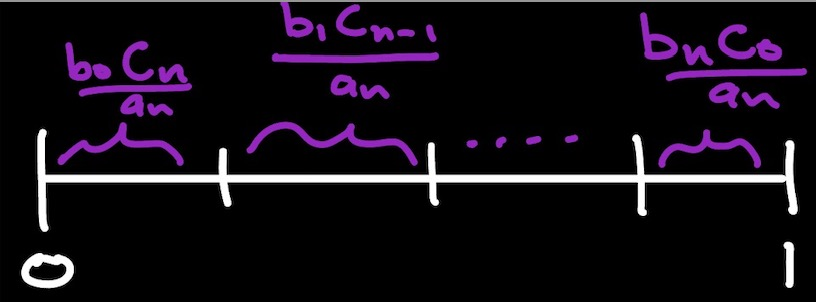

Thus, we define
```
genBxC(n): 
    x = RR.random(0,1)
    k = 0
    a(n) = sum(b(k)*c(n-k), k=0..n)
    s = b(0)c(n)/a(n)
    while x>s:
        k = k + 1
        s = s + b(k)*c(n-k)/a(n)
 
    return [genB(k),genC(n-k)]
```

The probability that $(\beta,\gamma) \in \mathcal{B}_k \times \mathcal{C}_{n-k}$ is returned is 

$$ \frac{b_k \cdot c_{n-k}}{a_n} \cdot \frac{1}{b_k} \cdot \frac{1}{c_{n-k}} = \frac{1}{a_n}.$$

#### Sequence
If $\mathcal{B}$ has no objects of size $0$ then $A = \text{SEQ}(B)$ is equivalent to $\mathcal{A} = \epsilon + \mathcal{B} \times \mathcal{A}$, and so we can get a *recursive algorithm*.

***Example:*** Write a uniform generation algorithm to find (unlabelled) binary rooted trees of size $n$.

In [3]:
# Recursive Generation Algorithm
# B = E + Z x B x B
def genTree(n):
    # Return ϵ from first part of +
    if n==0:
        return 'ϵ'

    Bn = binomial(2*n,n)/(n+1) # Counting sequence
    x = RR.random_element(0,1) # Random real in (0,1)

    # Find the size k of the first element in a pair of trees of size n-1
    k = 0
    s = (binomial(2*k,k)/(k+1) * binomial(2*(n-k-1),n-k-1)/(n-k))/Bn
    while x > s:
        k = k+1
        s = s + (binomial(2*k, k)/(k+1) * binomial(2*(n-k-1), n-k-1)/(n-k))/Bn
    
    # Return a tuple from the product
    return ['Z', genTree(k), genTree(n-k-1)]

In [4]:
# Generate tree of size 3
genTree(3)

['Z', ['Z', 'ϵ', 'ϵ'], ['Z', 'ϵ', 'ϵ']]

In [5]:
# Generate tree of size 10
genTree(10)

['Z',
 ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ'],
 ['Z',
  'ϵ',
  ['Z', 'ϵ', ['Z', ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ'], ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ']]]]]

In [6]:
# Change code to output 'BinaryTree' data structure
# which we use for plotting with Sage commands
def genTreePlot(n):
    # Return ϵ from first part of +
    if n==0:
        return None

    Bn = binomial(2*n,n)/(n+1) # Counting sequence
    x = RR.random_element(0,1) # Random real in (0,1)

    # Find the size k of the first element in a pair of trees of size n-1
    k = 0
    s = (binomial(2*k,k)/(k+1) * binomial(2*(n-k-1),n-k-1)/(n-k))/Bn
    while x > s:
        k = k+1
        s = s + (binomial(2*k, k)/(k+1) * binomial(2*(n-k-1), n-k-1)/(n-k))/Bn
    
    # Return a tuple from the product
    return BinaryTree([genTreePlot(k), genTreePlot(n-k-1)])

# Code to plot tree (with various plot options set)
def plotTree(BT):
    BT.graph().show(layout='tree',tree_orientation='down',figsize=(10,10),vertex_size=20, fig_tight=False, vertex_labels=False)

In [7]:
# Can use basic ascii plotter
ascii_art(genTreePlot(10))

  _______o_______
 /               \
o                 o
 \               /
  o             o
   \           /
    o         o
     \        
      o       
       \      
        o     
         \    
          o   

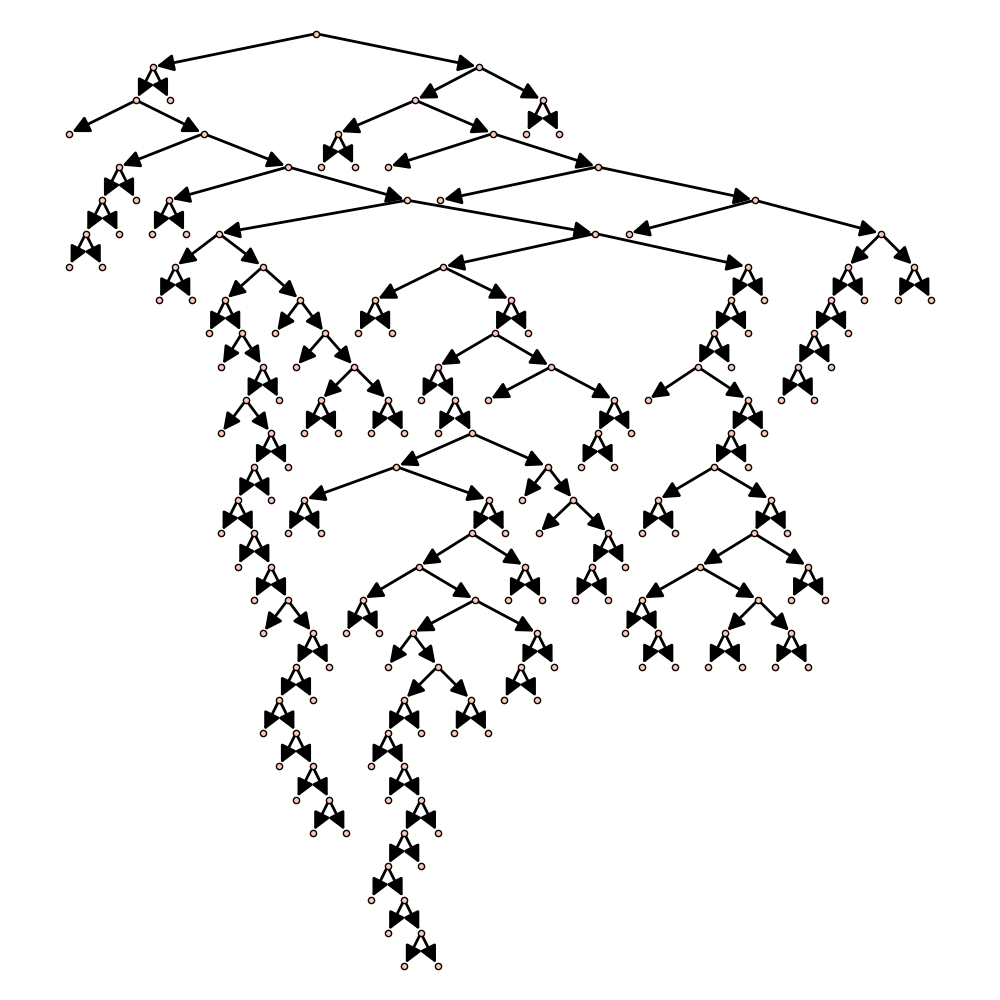

In [8]:
BT = genTreePlot(100) # Generate tree
plotTree(BT) # Plot with correct options

In [9]:
# Recall we proved using bivariate GFs and LIFT that the 
# average number of leaves in a tree of size n -> n/4 as n->infinity
from numpy import mean
N = 160
pt = [str(genTreePlot(N)).count('[., .]') for k in range(100)]
mean(pt)

40.7

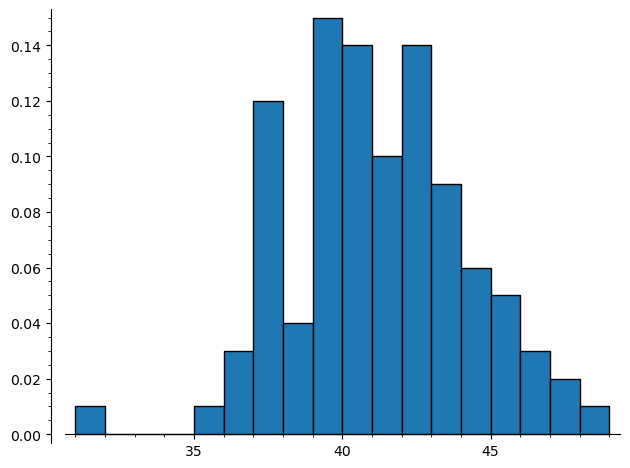

In [10]:
# Can see the number of leaves approaching a normal distribution
plot(histogram(pt,bins=max(pt) - min(pt), density=True, range=[min(pt),max(pt)]))

## Boltzmann Sampling

Recursive sampling is powerful, but can be slow for complicated objects.

Instead of saying we **need** an object of size $n$, we can look for an object of size (say) $[0.9n,1.1n]$ and (in general) do better.

The elegant framework for handling this is **Boltzmann sampling**.

 Recall that if $F(z) = \sum f_nz^n$ has radius of convergence $R$ then $F(p)$ exists for $|p| < R$. 
 
 We call the points $v \in (0,R)$ the **admissible values** of $F$.

Let $\mathcal{A}$ be a combinatorial class and $v$ an admissible value for $A(x)$.

A **Boltzmann model** at $v$ assigns each $\alpha \in \mathcal{A}$ the probability

$$\mathbb{P}_v(\alpha) = \frac{v^{|\alpha|}}{A(v)}.$$

Note that 

$$ \sum_{\alpha \in \mathcal{A}} \mathbb{P}_v(\alpha) = \frac{\sum_{\alpha \in \mathcal{A}} v^{|\alpha|}}{A(v)} = \frac{A(v)}{A(v)}=1.$$

and $\mathbb{P}_v(\alpha)$ depends only on $|\alpha|$.

A **Boltzmann generation algorithm** with parameter $v$ is a randomized algorithm that returns $\alpha \in \mathcal{A}$ with probability $\mathbb{P}_v(\alpha)$.

Note that $v$ is a **parameter**: we can "tune" it to get objects of roughly the size we want.

The **expected size** of the Boltzmann algorithm with parameter $v$ is

$$ \sum_{\alpha \in \mathcal{A}} |\alpha| \mathbb{P}_v(\alpha) = \frac{\sum_{\alpha \in \mathcal{A}} |\alpha| v^{|\alpha|}}{A(v)} = \frac{vA'(v)}{A(v)}.$$

**Example:** For rooted binary trees with generating function $B(z) = \frac{1-\sqrt{1-4z}}{2z}$ we have $R = 1/4$. 

We have the following probabilities for different parameters

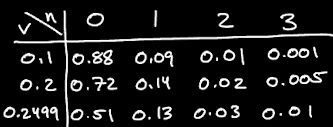

The expected sizes are 
- $\approx 0.14$ if $v = 0.1$
- $\approx 0.62$ if $v = 0.2$
- $\approx 24.5$ if $v = 0.2499$

### Building Boltzmann Samplers
The neutral class $\epsilon$ has generating function $1$ so its Boltzmann generator returns a single $\epsilon$ with probability $v^0/1 = 1$.

The atomic class has generating function $z$ so its Boltzmann generator returns a single atom with probability $v^1/v = 1$.

```
BOLT-ϵ(v): return ϵ
BOLT-Z(v): return Z
```

What about our constructions?

#### Combinatorial Sum
Suppose $\mathcal{A} = \mathcal{B} + \mathcal{C}$ and we have uniform generation algorithms `BOLT-B(n)` and `BOLT-C(n)`. How do we build `BOLT-A(n)`?

The probability that $\alpha \in \mathcal{A}$ comes from $\mathcal{B}$ should be

$$ \sum_{\beta \in \mathcal{B}} \frac{v^{|\beta|}}{A(v)} = \frac{B(v)}{A(v)} \in (0,1).$$

**Note:** Any admissible value for $A(z)$ is also admissible for $B(z)$.

```
BOLT-A(v):
    u = RR.random(0,1)
    if u < B(v)/A(v) return BOLT-B(v)
    else return BOLT-C(v)
```

#### Combinatorial Product
Suppose $\mathcal{A} = \mathcal{B} \times \mathcal{C}$ and we have uniform generation algorithms `BOLT-B(n)` and `BOLT-C(n)`. How do we build `BOLT-A(n)`?

If $\alpha = (\beta,\gamma)$ then

$$\frac{v^{|\alpha|}}{A(v)} = \frac{v^{|\beta| + |\gamma|}}{A(v)} = \frac{v^{|\beta|}}{A(v)} \cdot \frac{v^{|\gamma|}}{A(v)}.$$

This means each component is **independent**.

```
BOLT-A(v):
    return [BOLT-B(v), BOLT-C(v)]
```

So much **easier** than recursive sampling.

#### Sequence
If $\mathcal{A}=\text{SEQ}(B)$ we can still use the recursive trick, but can also be more direct.

What is the probability that $(\beta_1,\dots,\beta_k)$ appears?

$$\frac{v^{|\beta_1| + \cdots + |\beta_k|}}{1/(1-B(v))} = \frac{v^{|\beta_1|}}{B(v)} \cdots \frac{v^{|\beta_k|}}{B(v)} \cdot B(v)^k \cdot (1-B(v)).$$

Thus, the probability that a $k$-tuple appears should be

$$\sum_{\beta_1,\dots,\beta_k \in \mathcal{B}} \frac{v^{|\beta_1|}}{B(v)} \cdots \frac{v^{|\beta_k|}}{B(v)} \cdot B(v)^k \cdot (1-B(v)) = B(v)^k (1-B(v)).$$

This is known as a **geometric distribution**.

```
BOLT-A(v):
    k = Geometric(B(v))
    return k-tuple [BOLT-B(v),...,BOLT-B(v)]
```

In [11]:
# Output natural number k with P(k returned) = λ^k*(1-λ)
def Geometric(λ):
    # Check if λ in (0,1)
    if not (λ > 0 and λ <1): 
        return "Error (λ must be in (0,1))"
    
    u = RR.random_element(0,1) # Random real in (0,1)
    k = 0
    s = 1 - λ
    while s < u:
        k = k+1
        s = s + λ^k*(1-λ)
    
    return k

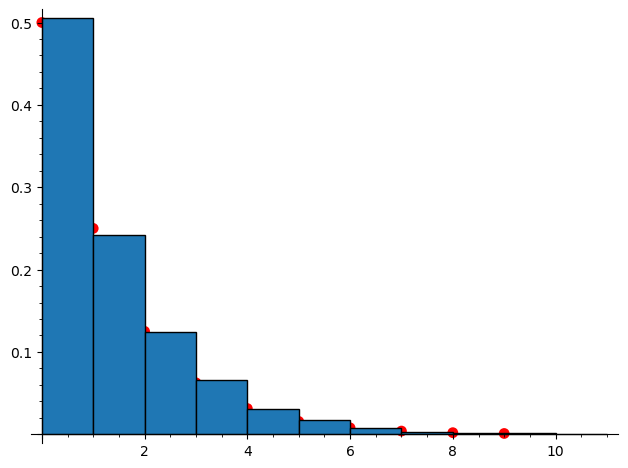

In [12]:
# Optional check that Geometric(λ) follows expected distribution
L = 1/2
pt = [Geometric(L) for k in range(10000)]
p1 = plot(histogram(pt,bins=max(pt) - min(pt), density=True, range=[min(pt),max(pt)]))
p2 = point([[k, L^k*(1-L)] for k in range(10)], color = 'red', pointsize=60)
p1+p2

**Example:** Find a Boltzmann generation algorithm for rooted binary trees.

In [13]:
# Boltzmann Generation Algorithm
def BoltzmannTree(x):
    u = RR.random_element(0,1)
    T = (1-sqrt(1-4*x))/(2*x)

    # Handle +
    if u < 1/T:
        return 'ϵ'
    
    # Handle x
    return ['Z', BoltzmannTree(x), BoltzmannTree(x)]

In [14]:
BoltzmannTree(0.2)

'ϵ'

In [15]:
[BoltzmannTree(0.2) for k in range(10)]

['ϵ',
 ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ'],
 ['Z', 'ϵ', 'ϵ'],
 ['Z', 'ϵ', 'ϵ'],
 ['Z',
  ['Z',
   'ϵ',
   ['Z',
    ['Z', 'ϵ', 'ϵ'],
    ['Z',
     ['Z', 'ϵ', 'ϵ'],
     ['Z', 'ϵ', ['Z', 'ϵ', ['Z', 'ϵ', ['Z', 'ϵ', 'ϵ']]]]]]],
  'ϵ'],
 'ϵ',
 'ϵ',
 ['Z', 'ϵ', 'ϵ'],
 'ϵ',
 'ϵ']

In [16]:
BoltzmannTree(0.2499)

['Z',
 'ϵ',
 ['Z',
  ['Z',
   'ϵ',
   ['Z',
    ['Z', 'ϵ', ['Z', 'ϵ', ['Z', 'ϵ', 'ϵ']]],
    ['Z',
     'ϵ',
     ['Z',
      ['Z',
       ['Z', 'ϵ', ['Z', 'ϵ', ['Z', 'ϵ', 'ϵ']]],
       ['Z', 'ϵ', ['Z', 'ϵ', 'ϵ']]],
      ['Z',
       ['Z',
        ['Z',
         'ϵ',
         ['Z', ['Z', 'ϵ', ['Z', 'ϵ', 'ϵ']], ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ']]],
        ['Z', 'ϵ', ['Z', ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ'], 'ϵ']]],
       ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ']]]]]],
  ['Z', 'ϵ', 'ϵ']]]

In [17]:
# Change code to output 'BinaryTree' data structure
# which we use for plotting with Sage commands
def BoltzmannTreePlot(x):
    u = RR.random_element(0,1)
    T = (1-sqrt(1-4*x))/(2*x)

    # Handle sum
    if u < 1/T:
        return BinaryTree(None)
    
    # Handle product
    return BinaryTree([BoltzmannTreePlot(x), BoltzmannTreePlot(x)])

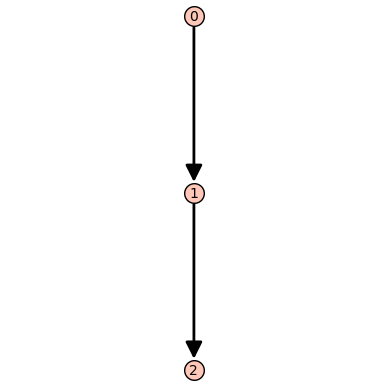

In [32]:
BT = BoltzmannTreePlot(0.249) # Generate tree
BT.show()

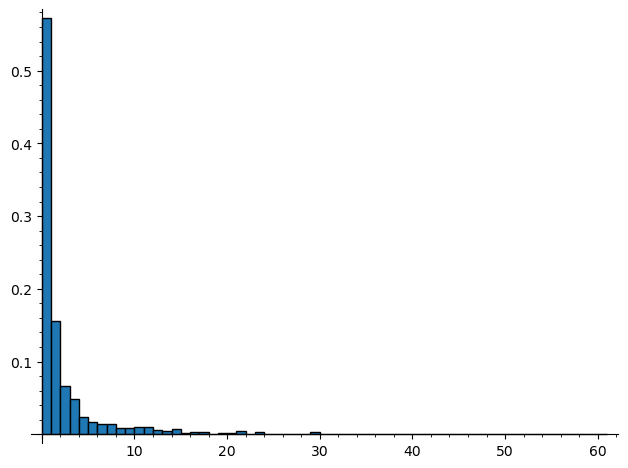

In [19]:
# If we look at the output sizes, we note that most trees
# have small size but occasionally we get a very large tree 
xx = 0.24
pt = [str(BoltzmannTreePlot(xx)).count('[') for k in range(1000)]
pexp = plot(histogram(pt,bins=max(pt), density=True, range=[min(pt),max(pt)]))
pexp

In [20]:
# This experimental data matches the expected number with each size
var('x n')
T = (1-sqrt(1-4*x))/(2*x)
Bn = binomial(2*n,n)/(n+1)
ptheory = point([[k, Bn.subs(n=k) * xx^k/T.subs(x=xx)] for k in range(10)], color = 'red', pointsize=20)
ptheory

**Theorem (Duchon, Flajolet, Louchard, Schaffer 2004):** Fix $\epsilon>0$ and let $\mathcal{C}$ be a combinatorial class such that 
- $C(z)$ has a finite radius of convergence $R>0$ 
- $\lim_{z\rightarrow R^-} \frac{zC'(z)}{C(z)} = \infty$
- a technical "variance condition" holds

Let $z_n$ be the smallest positive root of $n = \frac{zC'(z)}{C(z)}$.

Repeatedly call BOLT-C($z_n$) until it returns something with size in $[(1-\epsilon)n,(1+\epsilon)n]$.

The happens with probability going to $1$ as $n\rightarrow\infty$ and on average takes $O(n)$ total operations.

**Note:** Random generation has lots of practical applications (for instance, bugs in the Glasgow Haskell Compiler have been found by randomly generating large "λ-terms" 

The function $E(z) = \frac{zC'(z)}{C(z)}$ tracks the expected Boltzman size for $z \in (0,R)$. 

The "pointier" this distribution is, the better Boltzman sampling works.

We can improve Boltzmann sampling by considering related classes with more peaked distributions.

**Example:** A **marked rooted binary tree** is a binary tree where one noe is "marked". Since all trees of size $n$ are marked in $n$ ways, we can randomly generate a rooted binary tree by generating a marked tree and forgetting which node is marked.

If $\mathcal{B}^*$ is the class of marked rooted binary trees then
$$
\mathcal{B} = \epsilon + \mathcal{Z} \times \mathcal{B} \times \mathcal{B}
$$
and 
$$
\mathcal{B}^* = \mathcal{Z}^* \times \mathcal{B} \times \mathcal{B} + \mathcal{Z} \times \mathcal{B}^* \times \mathcal{B} + \mathcal{Z} \times \mathcal{B} \times \mathcal{B}^*.
$$

In [21]:
# Give Boltzmann sampler for pointed binary trees
def BoltzmannPointedTree(x):
    var('z')
    u = RR.random_element(0,1)
    
    T = (1-sqrt(1-4*z))/(2*z)
    pointedT = z*T.diff(z)
    T = T.subs(z=x)
    pointedT = pointedT.subs(z=x)
    
    # handle union
    if u < x*T^2/pointedT:
        return ['Z', BoltzmannTree(x), BoltzmannTree(x)]
    if u < x*T^2/pointedT + x*pointedT*T/pointedT:
        return ['Z', BoltzmannPointedTree(x), BoltzmannTree(x)]
    
    return ['Z', BoltzmannTree(x), BoltzmannPointedTree(x)]

In [22]:
# We more often get trees of large size
BoltzmannPointedTree(0.2)

['Z', 'ϵ', 'ϵ']

In [23]:
# Redo function for plotting
def BoltzmannPointedTreePlot(x):
    var('z')
    u = RR.random_element(0,1)
    
    T = (1-sqrt(1-4*z))/(2*z)
    pointedT = z*T.diff(z)
    T = T.subs(z=x)
    pointedT = pointedT.subs(z=x)
    
    # handle union
    if u < x*T^2/pointedT:
        return BinaryTree([BoltzmannTreePlot(x), BoltzmannTreePlot(x)])
    if u < x*T^2/pointedT + x*pointedT*T/pointedT:
        return BinaryTree([BoltzmannPointedTreePlot(x), BoltzmannTreePlot(x)])
    
    return BinaryTree([BoltzmannTreePlot(x), BoltzmannPointedTreePlot(x)])

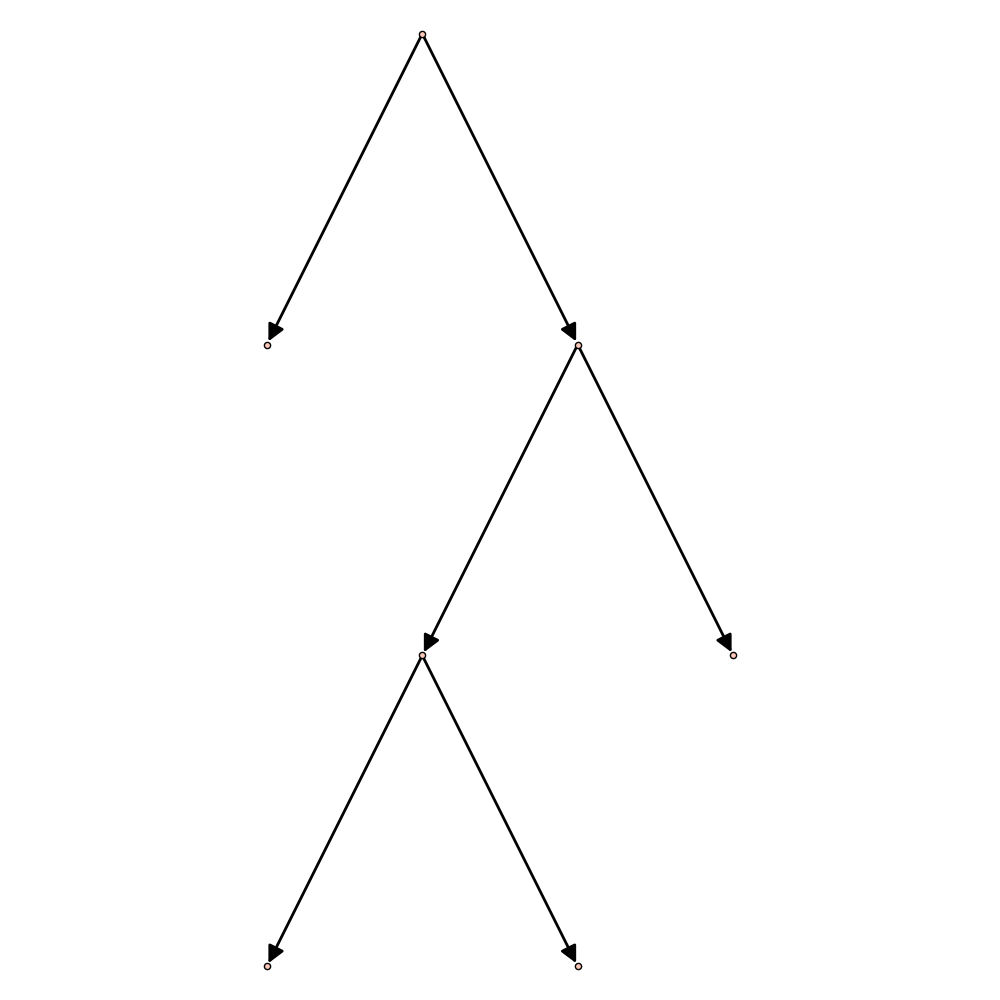

In [24]:
# We more often get trees of large size
plotTree(BoltzmannPointedTreePlot(0.2))

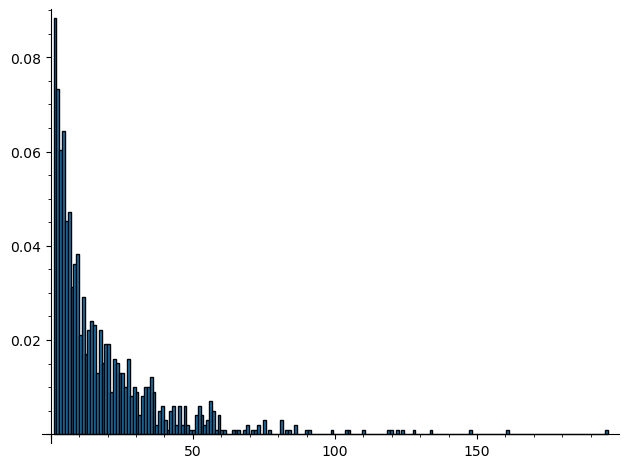

In [25]:
# The distribution is less bunched around x=0
xx = 0.24
pt = [str(BoltzmannPointedTreePlot(xx)).count('[') for k in range(1000)]
plot(histogram(pt,bins=max(pt), density=True, range=[min(pt),max(pt)]))

In [26]:
# Here we define the Boltzmann rejection sampler
# Keep applying Boltzmann until within 10% of desired size

# Helper function
def treeSize(BT): return str(BT).count('[')

# Repeatedly call Boltzmann sampler until tree of right size found
def BoltzmannReject(n):
    T = (1-sqrt(1-4*z))/(2*z)
    pointedT = z*T.diff(z)
    eq = (z*pointedT.diff(z)/pointedT) == n
    xx = eq.find_root(0,1/4)
    BT = BoltzmannPointedTreePlot(xx)
    while treeSize(BT)<0.9*n or treeSize(BT)>1.1*n:
        BT = BoltzmannPointedTreePlot(xx)
    return BT

In [27]:
BT = BoltzmannReject(100)
BT

[[., [[., [., [[., [., .]], [[., [., [[[[[[[[[., [., [[., .], [., [[[., [., [[[., [., [., [., .]]]], .], .]]], [., .]], [[., [[[[[., .], .], [., .]], [[[[., .], .], [[., [., [., [., .]]]], [., [[[., .], .], .]]]], .]], .]], .]]]]]], .], .], [., [., [., .]]]], .], .], [., .]], .], [., [[., .], .]]]]], [[., [[[[[., [[[[., .], .], [[[[[[., .], .], [., .]], .], .], [., .]]], .]], .], [., .]], [., .]], .]], .]]]]], [., [[[., [., [[., .], [., .]]]], .], [., [., [., .]]]]]]], [[[., [[., .], .]], [[., .], .]], .]]

In [28]:
treeSize(BT)

102

In [29]:
# Time how long until we get a tree of size ~1000 using Boltzmann
timeit('BoltzmannReject(1000)')

5 loops, best of 3: 765 ms per loop

In [30]:
# Time how long until we get a tree of size 1000 using recursive sampling
timeit('genTreePlot(1000)')

5 loops, best of 3: 1.98 s per loop

In [31]:
# Output an absurdly large random tree
# Trying to plot this monster will probably crash / lock up Sage
BT = BoltzmannReject(10000)
BT

[[[., [., [[., .], [., [[[[[., [., [., .]]], .], .], .], [[[[., .], [[[[[[., .], [[., .], .]], .], .], [[., .], [., .]]], .]], .], .]]]]]], [., [[., .], [[[., [[., [., [., .]]], .]], .], [[[[., [., [., .]]], .], [[[., [., .]], .], .]], [[[., [[., [[., [., [[., .], [., .]]]], .]], .]], [., .]], .]]]]]], [[[[., [[., [., .]], .]], .], [., [[[[., [[., [[., [[[[., .], .], [[[[[[[[., .], .], [., [[[., [., [[[[[[., .], .], .], [[[., [., [., .]]], .], .]], [[., [., .]], .]], .]]], .], [., [[[[[[., [[[[., .], .], [[., .], [., .]]], .]], [[[., [[., .], [[., [., [., .]]], [., .]]]], .], [., [[[[., .], [[., [., .]], [[[., [[., [[[., [[[[[., [[., .], [[[., .], [[[[., .], [., .]], .], .]], [[., [[., [[., [[[[[., [[[[[[., .], [[., .], [[., [., [[[., .], [., [., .]]], .]]], .]]], [., .]], .], [., .]], [., [[., .], .]]]], .], [., .]], [., .]], .]], [., .]]], [., .]]], .]]]], .], .], [., [., [[., .], .]]]], .]], [., .]], .]], [., [., [[[., .], [[[., [., .]], [., .]], .]], [., .]]]]]], [[., .], [., .]]],